In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('stiffened_data.csv')


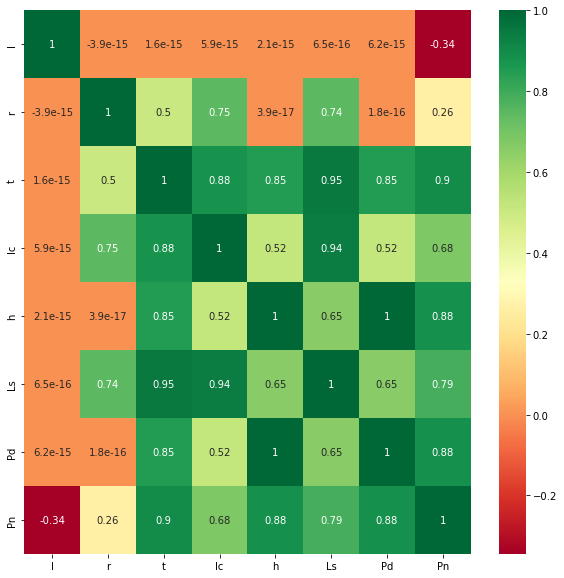

In [4]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [5]:
df

,l,r,t,Ic,h,Ls,Pd,Pn
0,4000,4000,19.032019,4.807114e+08,300,510.439359,3.016575,44.762297
1,4000,4000,22.204022,6.057656e+08,350,551.337521,3.519337,52.222679
2,4000,4000,25.376025,7.401036e+08,400,589.404603,4.022100,59.683062
3,4000,4000,28.548028,8.831232e+08,450,625.157987,4.524863,67.143445
4,4000,4000,31.720032,1.034326e+09,500,658.974379,5.027625,74.603828
...,...,...,...,...,...,...,...,...
37510,10000,8000,101.504101,3.349326e+10,800,1667.087965,8.044200,103.998578
37511,10000,8000,107.848107,3.668182e+10,850,1718.394942,8.546962,110.498489
37512,10000,8000,114.192114,3.996559e+10,900,1768.213808,9.049725,116.998400
37513,10000,8000,120.536120,4.334190e+10,950,1816.666993,9.552487,123.498311


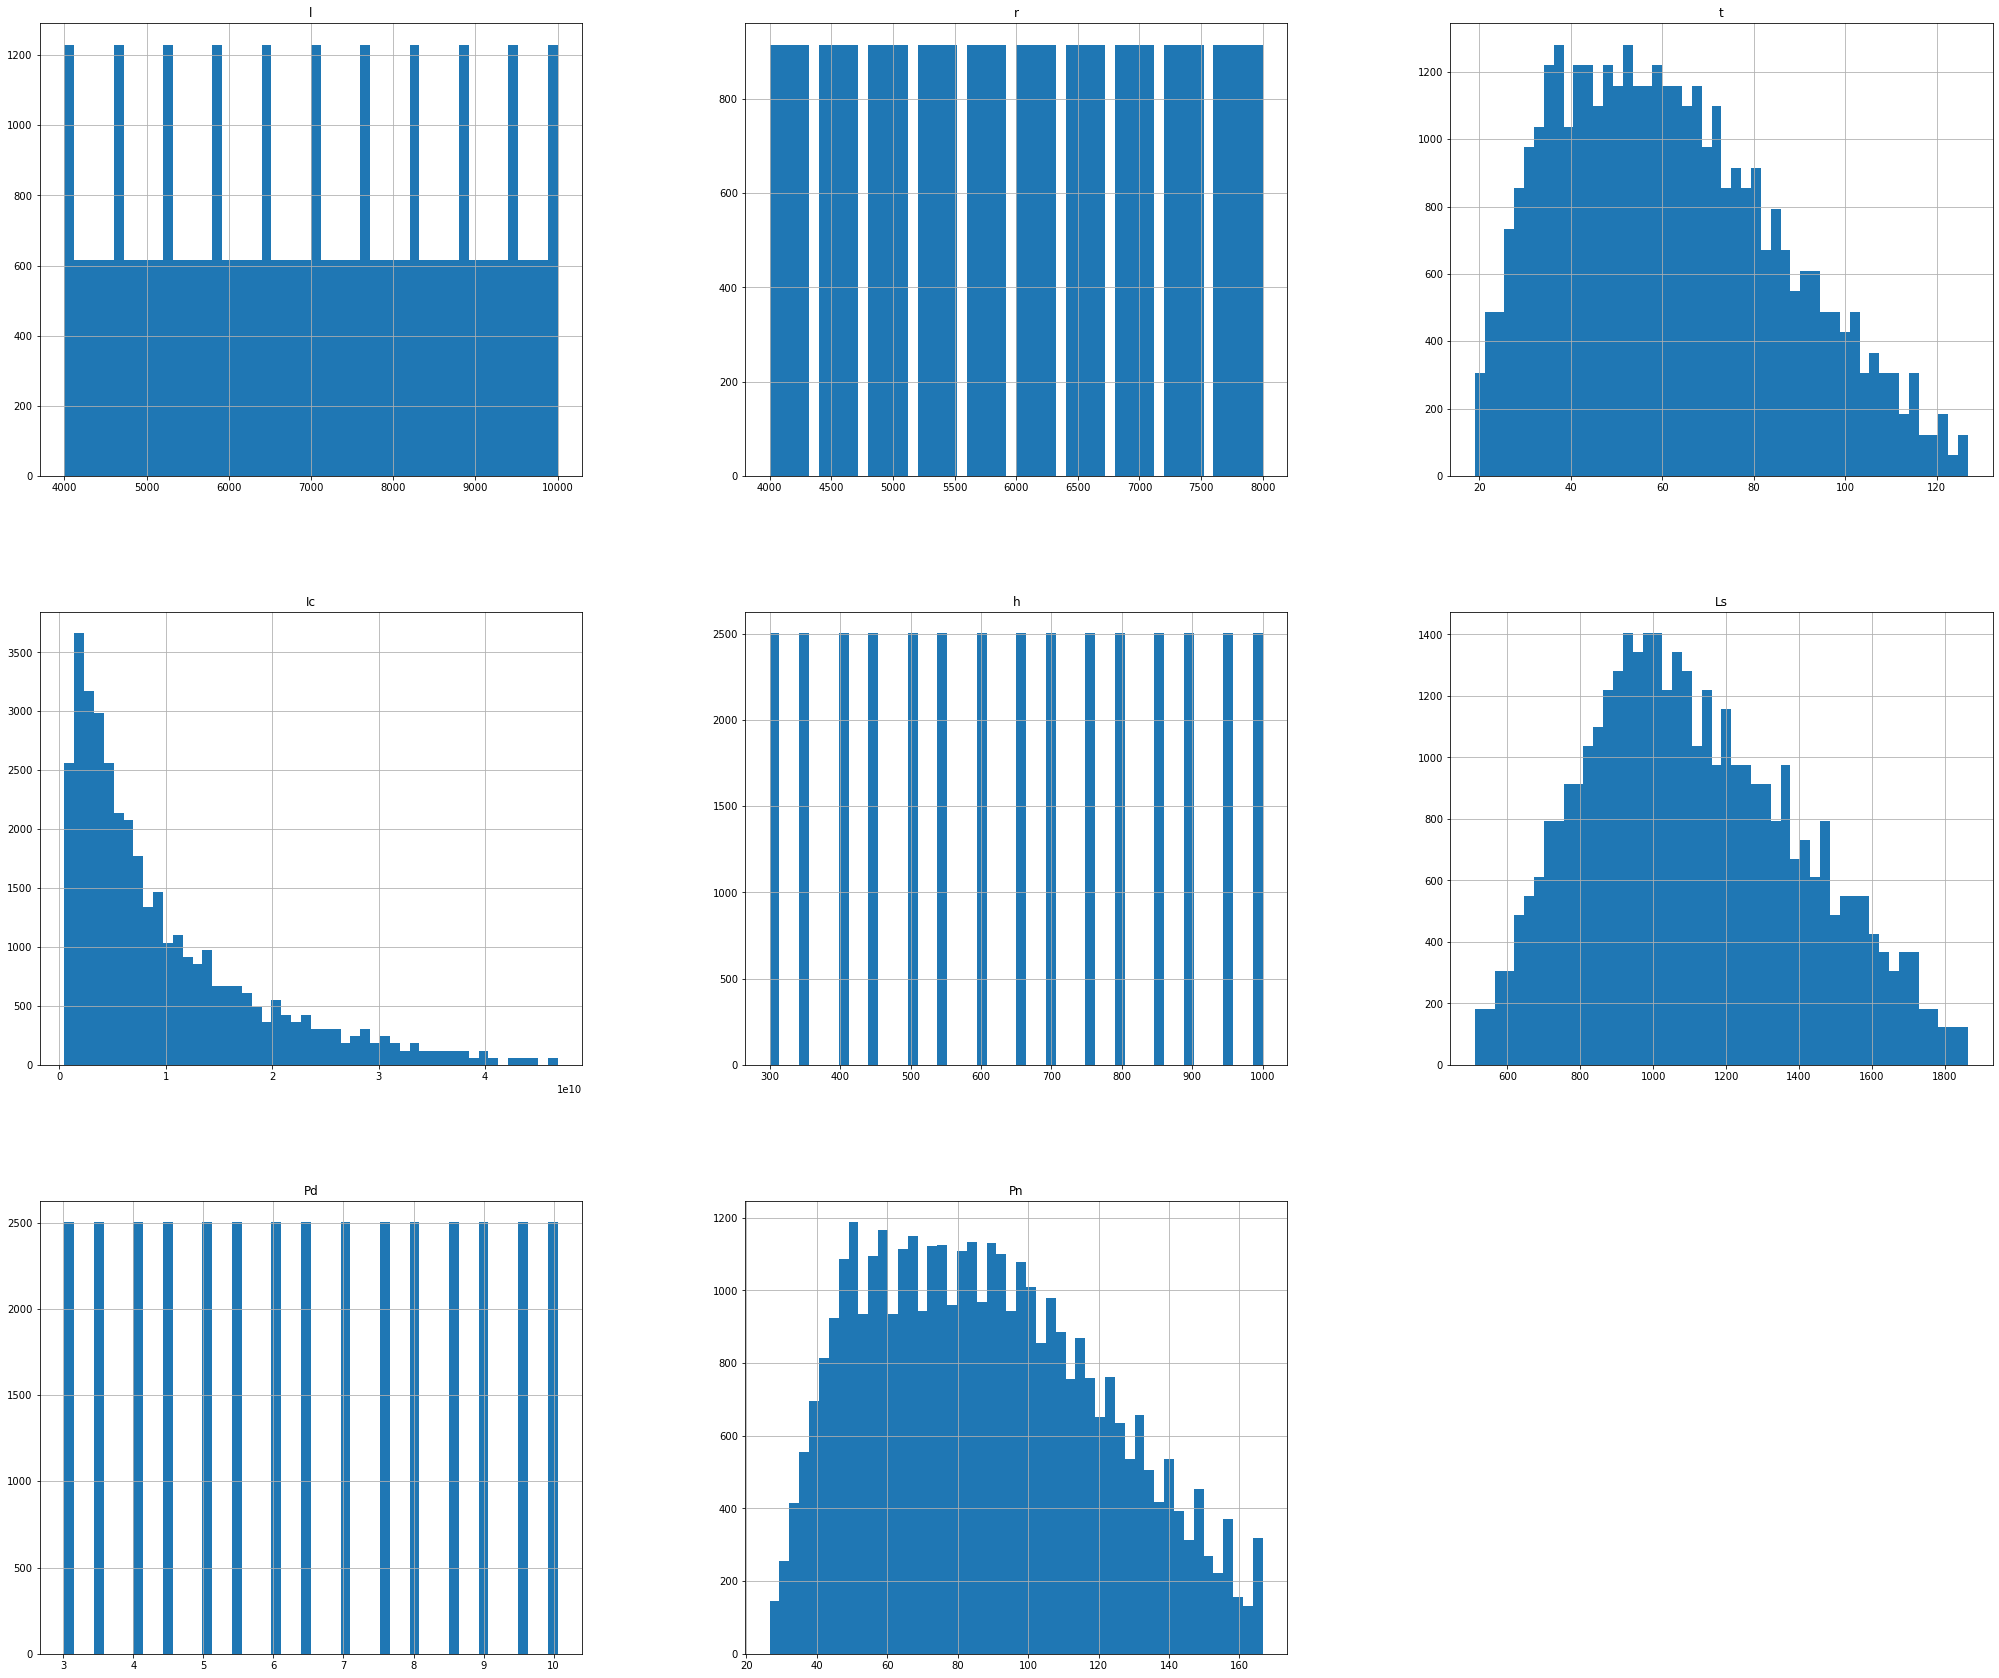

In [6]:
df.hist(figsize = (35,30), bins = 50)
plt.show()

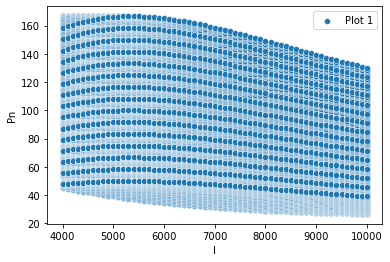

In [7]:
sns.scatterplot(data=df, x='l', y='Pn', label='Plot 1')


# Show the plot
plt.show()

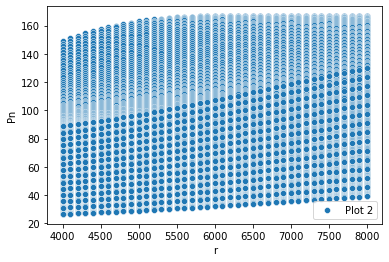

In [8]:
sns.scatterplot(data=df, x='r', y='Pn', label='Plot 2')
plt.show()

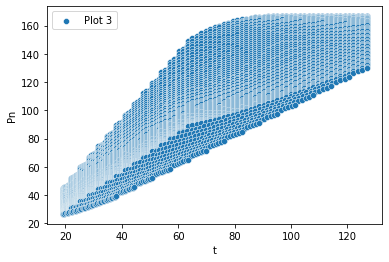

In [9]:
sns.scatterplot(data=df, x='t', y='Pn', label='Plot 3')
plt.show()

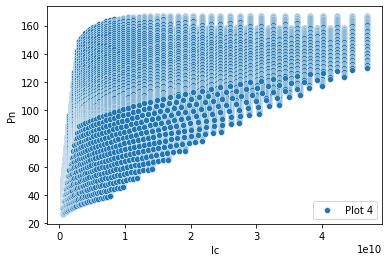

In [10]:
sns.scatterplot(data=df, x='Ic', y='Pn', label='Plot 4')
plt.show()

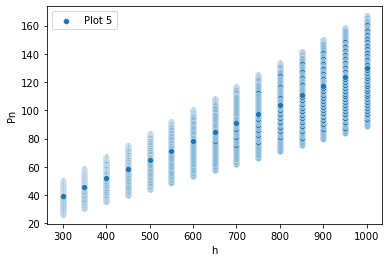

In [11]:
sns.scatterplot(data=df, x='h', y='Pn', label='Plot 5')
plt.show()

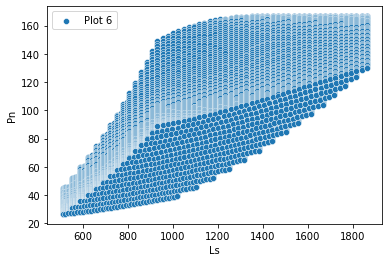

In [12]:
sns.scatterplot(data=df, x='Ls', y='Pn', label='Plot 6')
plt.show()

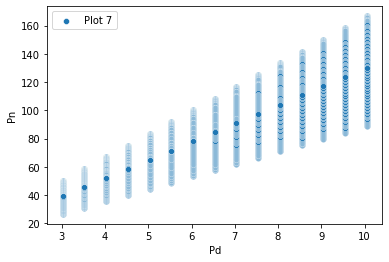

In [13]:
sns.scatterplot(data=df, x='Pd', y='Pn', label='Plot 7')
plt.show()

In [14]:
X = df[['l', 'r','h']]  # Input features
y = df['Pn']      

## Calculating test data with original Formula 
Test Data 
l=5000
r=4000
h=5000

In [15]:
l=5000
r=4000
h=500
E = 205 * 10**3
sy=951
Pd = 1025 * 9.81 * h * 10**(-6)

t = (1.5 * r * Pd) / sy
Ls = 1.85 * np.sqrt(r * t)

Ic = (Pd * (r ** 3) * Ls) / E
n = 3
u = (np.pi * r) / l

Pn = (((n ** 2 - 1) * E * Ic) / ((r ** 3) * Ls) + ((E * t / r) / ((n ** 2 - 1 + (u ** 2) / 2) * (n ** 2 / u ** 2 + 1) ** 2)))
Pn  

64.99911104724328

In [16]:
t

31.72003154574132

In [17]:
X

,l,r,h
0,4000,4000,300
1,4000,4000,350
2,4000,4000,400
3,4000,4000,450
4,4000,4000,500
...,...,...,...
37510,10000,8000,800
37511,10000,8000,850
37512,10000,8000,900
37513,10000,8000,950


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

# Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.970072640509915

## Predicted - original 
**650 - 673 = 23 Mpa**

In [20]:
model.predict([[5000,4000,5000]])

C:\Users\jambh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([673.73130469])

In [21]:
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)


In [22]:
MAE

4.160793998506823

In [23]:
MSE

32.509474260980255

In [24]:
RMSE

5.7017080126029125

# Ridge Regression

In [25]:
from sklearn.linear_model import Ridge
ridgeReg = Ridge(alpha=0.02, normalize=True)
ridgeReg.fit(X_train,y_train)
ridgeReg.score(X_test,y_test)

C:\Users\jambh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(


0.9697753418939996

## Error metrics is similar to linear

In [26]:
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [27]:
MAE

4.160793998506823

In [28]:
MSE

32.509474260980255

In [29]:
RMSE

5.7017080126029125

# Polynomial Regression

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming you have your original features matrix X and target variable y

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)  # Transform the original features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
test_predictions = model.predict(X_test)

# Calculate RMSE and R-squared
rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
r2 = r2_score(y_test, test_predictions)

print("RMSE:", rmse)
print("R-squared:", r2)


RMSE: 2.6276242725222057
R-squared: 0.9936439839643622


In [31]:
s=[[5000,4000,5000]]   #(l,r,h)
X_poly = poly_features.fit_transform(s)
X_poly

array([[1.0e+00, 5.0e+03, 4.0e+03, 5.0e+03, 2.5e+07, 2.0e+07, 2.5e+07,
        1.6e+07, 2.0e+07, 2.5e+07]])

## Comparing with original formula
Predicted - Original Pn

661-649= **11**

In [32]:
model.predict(X_poly)

array([661.60315151])

In [33]:
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [34]:
MAE

1.9312178120394168

In [35]:
MSE

6.90440931754785

In [36]:
RMSE

2.6276242725222057

## Scaling and splitting data

In [37]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# KNN 

In [38]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [39]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(scaled_X_train, y_train)  #fit the model
    pred=model.predict(scaled_X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.7191030109888533
RMSE value for k=  2 is: 0.40011217128184656
RMSE value for k=  3 is: 0.37257964279981276
RMSE value for k=  4 is: 0.35246601074826134
RMSE value for k=  5 is: 0.3395916279940232
RMSE value for k=  6 is: 0.3267428655408887
RMSE value for k=  7 is: 0.3256095275938455
RMSE value for k=  8 is: 0.33553297546421407
RMSE value for k=  9 is: 0.3412842760418725
RMSE value for k=  10 is: 0.34680104779401166
RMSE value for k=  11 is: 0.35369490231335154
RMSE value for k=  12 is: 0.3595545342071507
RMSE value for k=  13 is: 0.3742824499141879
RMSE value for k=  14 is: 0.38430178842087515
RMSE value for k=  15 is: 0.390231864558597
RMSE value for k=  16 is: 0.4011589824506919
RMSE value for k=  17 is: 0.4076169452572321
RMSE value for k=  18 is: 0.4193374734355419
RMSE value for k=  19 is: 0.4355047684317075
RMSE value for k=  20 is: 0.4468868476074154


<AxesSubplot:>

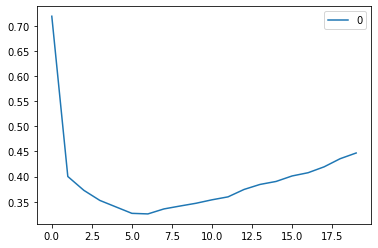

In [40]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

## Gridsearch cv for finding K

In [41]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 7}

In [42]:
model = neighbors.KNeighborsRegressor(n_neighbors = 7)
model.fit(X_train, y_train)  #fit the model
pred=model.predict(X_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
error

2.5525503404101655

In [43]:
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, test_predictions)
r2

0.9940019913751805

In [44]:
RMSE

2.5525503404101655

In [45]:
MAE

1.8950926010010056

In [46]:
scaler = StandardScaler()
s = scaler.fit_transform([[5000,4000,500]])

In [47]:
model.predict(s)

C:\Users\jambh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([80.9984413])

# KNN by Minmax scaling

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform(X_test)


In [49]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 7}

## getting same results with standard scaler and Min max

In [50]:
s = scaler.fit_transform([[5000,4000,5000]])
model.predict(s)

C:\Users\jambh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


array([80.9984413])

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [52]:
test_predictions = model.predict(X_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)
r2 = r2_score(y_test, test_predictions)
r2

0.9993999090787941

In [53]:
RMSE

0.80738244274381

In [54]:
model.predict([[5324,4432,500]])

C:\Users\jambh\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([66.64190822])

In [55]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its predictions
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)

# Calculate Mean Squared Error and R2 score to evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Mean Squared Error: {mse}")
print(f"Best R2 Score: {r2}")


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Mean Squared Error: 0.07133628650285685
Best R2 Score: 0.9999352854268933


In [1]:
best_rf_regressor.predict([[10080,8500,250]])

NameError: name 'best_rf_regressor' is not defined